<a href="https://colab.research.google.com/github/evansemet/Cracking-The-Cryptic-Solutions/blob/main/The_Miracle_Killer_Sudoku.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install z3-solver
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import time
from z3 import *

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
def printBoard(board):
  x = np.ones((3,3))
  groups = np.block([[x*0,x*1,x*2], [x*3,x*4,x*5], [x*6,x*7,x*8]])
  fig, ax = plt.subplots(1, 1, figsize=(3, 3))
  x = np.array(board.astype('int').astype('str'))
  x[x == "0"] = "-"
  ax = sns.heatmap(groups, annot=x, cbar=False, cmap="tab20", fmt="", vmin=0, vmax=19, linewidths=1, annot_kws={"size":10})
  ax.axis("off")    
  plt.tight_layout()
  plt.show()

Solving...
Solved in 18.964365005493164 seconds.


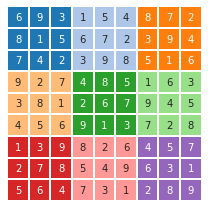

In [6]:
print("Solving...")
start = time.time()
board = np.zeros((9, 9))
X = np.array(IntVector('x', 9**2), dtype=object).reshape(9, 9)
s = Tactic('default').solver()

# normal sudoku
s += [And(i > 0, i < 10) for i in X.ravel()]
s += [Distinct(list(X[i, :])) for i in range(9)]
s += [Distinct(list(X[:, i])) for i in range(9)]
x = np.ones((3,3))
groups = np.block([[x*0,x*1,x*2], [x*3,x*4,x*5], [x*6,x*7,x*8]])
s += [Distinct(list(X[groups == i].ravel())) for i in range(9)]

# add in rules
s += X[1,1] + X[2,1] + X[3,1] == 7
s += X[1,5] + X[1,6] == 5
s += X[2,6] + X[2,7] == 6
s += X[3,5] + X[3,6] == 6
s += And(X[5,2] + X[5,3] + X[6,3] == 23, X[5,2] != X[6,3])
s += X[6,2] + X[7,2] == 17
s += X[8,5] + X[8,6] == 3
s += X[5,8] + X[6,8] == 15

if s.check() == sat:
  m = s.model()
  eval = np.vectorize(lambda x : m.evaluate(x))
  boardTemp = eval(X)
  print(f"Solved in {time.time() - start} seconds.")
  for (r, c), e in np.ndenumerate(boardTemp):
    board[r][c] = str(e)
  printBoard(board)
else:
  print(f"Failed in {time.time() - start} seconds.")